# Planes

Please install the packages numpy and matplotlib.  
Run a CMD (Click on Windows Symbol and search for CMD).  
Enter: `pip install --user numpy matplotlib`

## Single plane

Make matplotlib and numpy available ...

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Print floating point numbers with a reduced precision:

In [2]:
np.set_printoptions(precision=2)

Define a 3D homogeneous (+1D) plane:

In [3]:
plane_coefficients = [0, 0, 1, 2]
p_1 = plane_coefficients[0]
p_2 = plane_coefficients[1]
p_3 = plane_coefficients[2]
p_4 = plane_coefficients[3]

Sample 3D points of plane...  
For the sake of simplicity, we assume that the homogeneous coordinate \\(x_4 = w\\) of all sample points is \\(1\\).
Remember: \\(\pi_1 \cdot x_1 + \pi_2 \cdot x_2 + \pi_3 \cdot x_3 + \pi_4 \cdot x_4 = 0\\)

In [5]:
xx_1, xx_2 = np.meshgrid(range(-3,4), range(-3,4))
print("xx_1 is:")
print(xx_1)
print("xx_2 is:")
print(xx_2)
xx_4 = np.ones_like(xx_1, dtype=np.float)
print("xx_4 is:")
print(xx_4)

xx_1 is:
[[-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]
 [-3 -2 -1  0  1  2  3]]
xx_2 is:
[[-3 -3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3]]
xx_4 is:
[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]


Solve for unknown \\(z\\) coordinate (\\(z = x_3\\)):  
\\(x_3 = (-\pi_1 \cdot x_1 - \pi_2 \cdot x_2 - \pi_3 \cdot x_4)/\pi_4\\) 

In [6]:
xx_3 = (- xx_1 * p_1 - xx_2 * p_2 - xx_4 * p_4) / p_3
print("xx_3 is:")
print(xx_3)

xx_3 is:
[[-2. -2. -2. -2. -2. -2. -2.]
 [-2. -2. -2. -2. -2. -2. -2.]
 [-2. -2. -2. -2. -2. -2. -2.]
 [-2. -2. -2. -2. -2. -2. -2.]
 [-2. -2. -2. -2. -2. -2. -2.]
 [-2. -2. -2. -2. -2. -2. -2.]
 [-2. -2. -2. -2. -2. -2. -2.]]


Plot the surface:

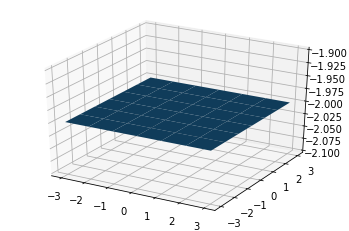

In [7]:
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx_1, xx_2, xx_3)
plt.show()

## Multiple planes using self-defined methods

Define a small function to avoid redundant code for multiple planes:

In [13]:
# The value after a method parameter indicates the default value which is used if the parameter value is not provided.
def sample_plane(coeffs, x_low=-3, x_up=3, y_low=-3, y_up=3):
    p_1, p_23, p_3, p4 = coeffs
    if p_3 == 0:
        raise ValueError("Unfortunately, this method does not support  planes with a z coefficient having a zero value!")
    x_range = range(x_low, x_up)
    y_range = range(y_low, y_up)
    xx_1, xx_2 = np.meshgrid(x_range, y_range)
    xx_4 = np.ones_like(xx_1, dtype=np.float)
    xx_3 = (- xx_1 * p_1 - xx_2 * p_2 - xx_4 * p_4) / p_3
    return xx_1, xx_2, xx_3

Sample two planes:

In [14]:
plane_1 = [1, 0, 1, 0]
plane_2 = [0, 0, 1, 0]
aa_1, aa_2, aa_3 = sample_plane(plane_1)
bb_1, bb_2, bb_3 = sample_plane(plane_2)

### Plot the planes:

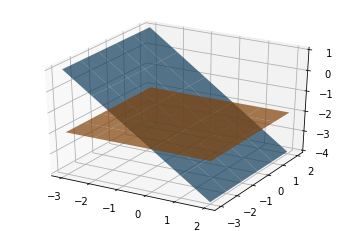

In [15]:
plt3d = plt.figure().gca(projection='3d')
transparency = 0.3
plt3d.plot_surface(aa_1, aa_2, aa_3, alpha=(1-transparency))
plt3d.plot_surface(bb_1, bb_2, bb_3, alpha=(1-transparency))
plt.show()